# Εργαστηριακή Άσκηση 9

## Εκφώνηση

Μελετήστε το παράδειγμα που παρουσιάζεται στο [Μια οπτική εισαγωγή στη μηχανική μάθηση](http://www.r2d3.us/%CE%BF%CF%80%CF%84%CE%B9%CE%BA%CE%AE-%CE%B5%CE%B9%CF%83%CE%B1%CE%B3%CF%89%CE%B3%CE%AE-%CF%83%CF%84%CE%B7-%CE%BC%CE%B7%CF%87%CE%B1%CE%BD%CE%B9%CE%BA%CE%AE-%CE%BC%CE%AC%CE%B8%CE%B7%CF%83%CE%B7-%CE%BC%CE%AD%CF%81%CE%BF%CF%82-1/) από την ομαδα [R2D3](http://www.r2d3.us/)

 Στην άσκηση αυτή θα δημιουργήσουμε ένα αντίστοιχο σενάριο που θα αφορά 2 υποθετικές πόλεις CITYA και CITYB. Θα δημιουργήσουμε συνθετικά δεδομένα με features τα elevation, price, sqft, bedrooms και με label το city και θα τα διαχωρίσουμε σε training/testing. Στη συνέχεια θα εκπαιδεύσουμε δύο classifiers, θα τους εκπαιδεύσουμε και θα θα εξετάσουμε accuracy και άλλα metrics στα testing δεδομένα.

In [1]:
# Εισαγωγή βιβλιοθηκών
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
# Δημιουργία συνθετικών δεδομένων
np.random.seed(7)
N = 500

# CITYA
citya_elev = np.random.normal(loc=80, scale=30, size=N)
citya_price = np.random.normal(loc=1100, scale=180, size=N)
citya_sqft = np.random.normal(loc=900, scale=120, size=N)
citya_beds = np.random.randint(1, 5, size=N)


# CITYB
cityb_elev = np.random.normal(loc=50, scale=25, size=N)
cityb_price = np.random.normal(loc=950, scale=150, size=N)
cityb_sqft = np.random.normal(loc=800, scale=80, size=N)
cityb_beds = np.random.randint(1, 4, size=N)

df = pd.DataFrame(
    {
        "elevation": np.concatenate([citya_elev, cityb_elev]),
        "price": np.concatenate([citya_price, cityb_price]),
        "sqft": np.concatenate([citya_sqft, cityb_sqft]),
        "bedrooms": np.concatenate([citya_sqft, cityb_sqft]),
        "city": ["CITYA"] * N + ["CITYB"] * N,
    }
)

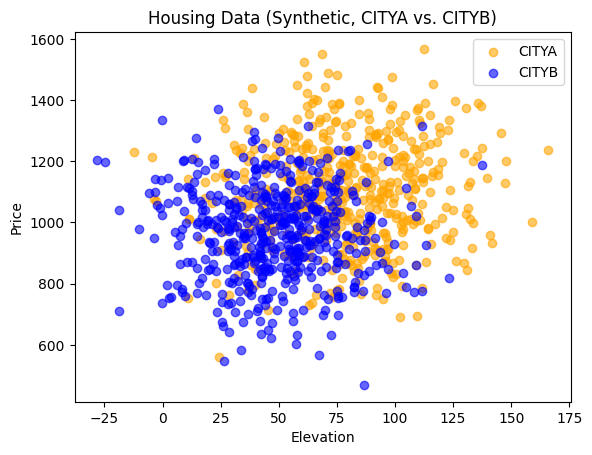

In [3]:
# Ερώτημα 1 
# Σχεδιάστε ένα scatter plot "elevation vs. price" για τις πόλεις CITYA, CITYB

colors = {"CITYA": "orange", "CITYB": "blue"}

plt.figure()
for c in ["CITYA", "CITYB"]:
    subset = df[df.city == c]
    plt.scatter(subset["elevation"], subset["price"],
                label=c, color=colors[c], alpha=0.6)

plt.xlabel("Elevation")
plt.ylabel("Price")
plt.title("Housing Data (Synthetic, CITYA vs. CITYB)")
plt.legend()
plt.show()


In [4]:
# Ερώτημα 2 
# Διαχωρείστε τα δεδομένα σε training/testing 75%-25% (χρησιμοποιήστε random_state=7)
# Εμφανίστε τις διαστάσεις των training set και των testing set
# Εμφανίστε το πλήθος ανά κλάση στο training set
# Εμφανίστε το πλήθος ανά κλάση στο testing set


X = df[["elevation", "price", "sqft", "bedrooms"]]
y = df["city"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=7,
)

print("Σχήμα X_train:", X_train.shape)
print("Σχήμα X_test :", X_test.shape)

print("\nΠλήθος ανά κλάση στο training set:")
print(y_train.value_counts())

print("\nΠλήθος ανά κλάση στο test set:")
print(y_test.value_counts())

Σχήμα X_train: (750, 4)
Σχήμα X_test : (250, 4)

Πλήθος ανά κλάση στο training set:
city
CITYA    381
CITYB    369
Name: count, dtype: int64

Πλήθος ανά κλάση στο test set:
city
CITYB    131
CITYA    119
Name: count, dtype: int64


Decision Tree accuracy: 0.812


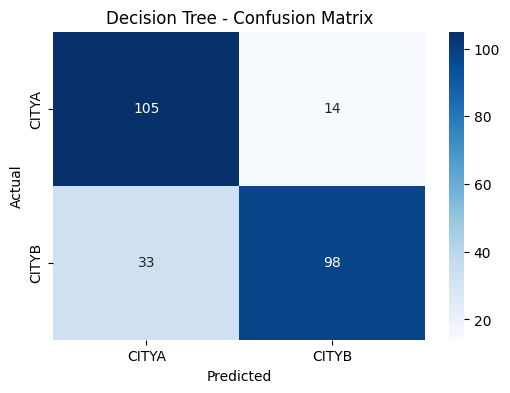

In [5]:
# Ερώτημα 3 
# Εκπαιδεύστε ένα δένδρο αποφάσεων (DecisionTreeClassifier με max_depth=4, random_state=7)
# Yπολογίστε το accuracy
# Εμφανίστε το confusion matrix (με το seaborn)

tree = DecisionTreeClassifier(max_depth=4, random_state=7)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree accuracy:", acc_tree)

cm_tree = confusion_matrix(y_test, y_pred_tree, labels=["CITYA", "CITYB"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues",
            xticklabels=["CITYA", "CITYB"],
            yticklabels=["CITYA", "CITYB"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression accuracy: 0.816


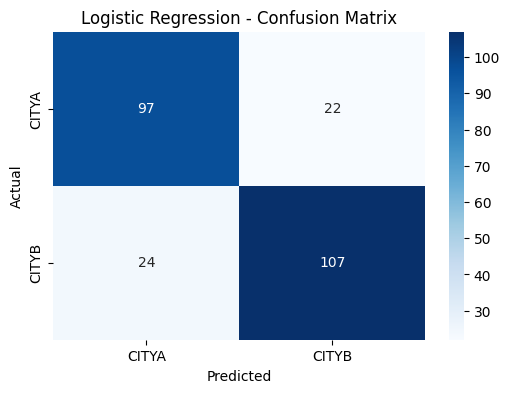

In [6]:
# Ερώτημα 4
# Εκπαίδευση classifier λογιστικής παλινδρόμηση (LogisticRegression)
# Yπολογίστε το accuracy
# Εμφανίστε το confusion matrix (με το seaborn)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

print("Logistic Regression accuracy:", acc_log)

cm_logreg = confusion_matrix(y_test, y_pred_log, labels=["CITYA", "CITYB"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=["CITYA", "CITYB"],
            yticklabels=["CITYA", "CITYB"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Ερώτημα 5
Για την περίπτωση του logistic regression καταγράψτε τις τιμές που έχουν υπολογιστεί για:
- TP (True Positive) = ? 
- TN (True Negative) = ?
- FP (False Positive) = ?
- FN (False Negative) = ?

Υπολογίστε με δικές σας πράξεις τις τιμές των: 
- precision = ?
- recall = ?
- F1-Score = ?